# Test trained model on few pictures
## Imports

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt

# Images
from PIL import Image
from matplotlib import image

# Model
from keras.models import load_model

## Utility functions

In [8]:
picture_size = 78


def plot_prediction(x, y_pred):
    """Plot single face with marked predicted centre.
    
    Where x is numpy array reprezenting a picture
    """
    fig, ax = plt.subplots(sharex=True,sharey=True)
    ax.imshow(x[:,:,:].astype('uint8'))
    ax.scatter(y_pred[0], y_pred[1], marker='X', c='b', s=10)
    
    
def resize_picture(img_array, new_size=picture_size):
    """Resize picture into given size
    
    returns trasformed picture and scale used during transformation
    """
    img = Image.fromarray(img_array)
    # resize image
    orginal_size = img.size
    img.thumbnail((new_size, new_size))
    # scale
    scale_x = img.size[0] / orginal_size[0]
    scale_y = img.size[1] / orginal_size[1]
    image_arr = np.asarray(img)
    # Add padding
    data = np.zeros((new_size, new_size, 3))
    data[:image_arr.shape[0], :image_arr.shape[1], :] = image_arr
    return data, scale_x, scale_y


def preprocess_picture(file_name, new_size=picture_size):
    """Transform given picture into new_size * new_size array
    
    returns trasformed picture and scale used during transformation
    """
    img = Image.open(file_name)
    # Covert into RGB
    if img.mode=='RGBA':
        background = Image.new("RGB", img.size, (255, 255, 255))
        background.paste(img, mask=img.split()[3])
        img = background
    return resize_picture(np.asarray(img), new_size)


def test_model(file_name, model):
    """Test model on single picture
    
    Plot face with predicted point
    """
    x, scale_x, scale_y = preprocess_picture(file_name)
    x = x / 255.0
    x = np.expand_dims(x, axis=0)
    y_pred = model.predict(x)
    x, y_pred = x * 255.0, y_pred * picture_size
    # load orginal image
    img = Image.open(file_name)
    # Covert into RGB
    if img.mode=='RGBA':
        background = Image.new("RGB", img.size, (255, 255, 255))
        background.paste(img, mask=img.split()[3])
        img = background
    img_arr = np.asarray(img)
    # Re scale
    y_pred[0, 0] = y_pred[0, 0] / scale_x
    y_pred[0, 1] = y_pred[0, 1] / scale_y
    plot_prediction(img_arr, y_pred[0, :])

## Load saved model

In [4]:
model = load_model(os.path.join("models", "basic_model"))
# Load model with regularization
# model = load_model(os.path.join("models", "reg_model"))

## Testing

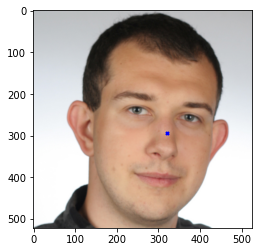

In [9]:
test_model(os.path.join("pictures", "test2.png"), model)

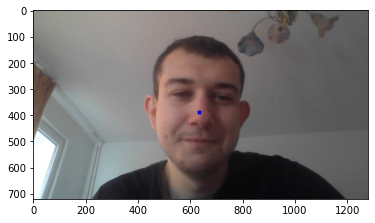

In [10]:
test_model(os.path.join("pictures", "test4.jpg"), model)